In [1]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings("ignore", category=UserWarning)
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score

In [2]:
df = pd.read_csv("/kaggle/input/bchurn/bank_data_train.csv")
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
0,146841,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
1,146842,0,0.041033,NaN,NaN,NaN,NaN,0.0,0.166667,0.186107,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,146843,0,0.006915,0.0,NaN,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,146844,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,146845,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [3]:
df.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


In [5]:
df.isna().sum()


ID                               0
CR_PROD_CNT_IL                   0
AMOUNT_RUB_CLO_PRC           38323
PRC_ACCEPTS_A_EMAIL_LINK    200027
APP_REGISTR_RGN_CODE        294640
                             ...  
TURNOVER_DYNAMIC_CC_3M           0
LDEAL_ACT_DAYS_PCT_TR       261742
LDEAL_ACT_DAYS_PCT_TR4      261742
LDEAL_ACT_DAYS_PCT_CURR     261742
TARGET                           0
Length: 116, dtype: int64

In [6]:
df_copy = df.copy()
df_copy.dropna(inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 0.0+ bytes


In [7]:
imputer = SimpleImputer(strategy='mean')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [8]:
df[numerical_cols].isna().sum().any()

False

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].isna().sum()

CLNT_TRUST_RELATION            285769
APP_MARITAL_STATUS             286956
APP_KIND_OF_PROP_HABITATION    295829
CLNT_JOB_POSITION_TYPE         310409
CLNT_JOB_POSITION              144379
APP_DRIVING_LICENSE            297933
APP_EDUCATION                  287086
APP_TRAVEL_PASS                297933
APP_CAR                        297934
APP_POSITION_TYPE              294645
APP_EMP_TYPE                   287828
APP_COMP_TYPE                  287828
PACK                                0
dtype: int64

In [10]:
# Filling Missing values in categorical columns.
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])
df[categorical_cols].isna().sum().any()

False

In [11]:
numerical_cols = numerical_cols.drop(['TARGET'])
print('Total numerical columns :',len(numerical_cols))

Total numerical columns : 102


In [12]:
# Splitting the data
X = df.drop(columns='TARGET')
y = df['TARGET']

In [13]:
# Checking skewness and kurtosis to find distribution of data
for col in numerical_cols:
    skewness = round(X[col].skew())
    kurtosis = round(X[col].kurt())
    
    if skewness == 0 and kurtosis == 3:
        print('Normal distribution')
    else:
        print('Not Normal distribution')
        break

Not Normal distribution


In [14]:
X.describe() # to see difference between 3rd quantile and maximum to find outliers

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
count,355190.000000,355190.000000,355190.000000,355190.0,355190.000000,355190.0,355190.0,355190.000000,355190.000000,355190.000000,...,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.051419,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938
std,128148.804566,0.431372,0.102432,0.0,8.991638,0.0,0.0,0.029118,0.147466,0.157772,...,0.069224,0.066681,0.112079,0.059362,0.097698,0.048167,0.059852,0.049804,0.049804,0.049804
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,50.947498,0.0,0.0,0.000000,0.416896,0.414572,...,0.051419,0.000000,0.000000,0.025707,0.049943,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.003523,0.0,50.947498,0.0,0.0,0.000000,0.416896,0.414572,...,0.051419,0.000000,0.055074,0.025707,0.049943,0.009252,0.000000,0.013938,0.013938,0.013938
75%,479737.750000,0.000000,0.044045,0.0,50.947498,0.0,0.0,0.000000,0.416896,0.414572,...,0.051419,0.000000,0.055074,0.025707,0.049943,0.009252,0.000000,0.013938,0.013938,0.013938
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# applying the outlier handling function to all numerical columns
for col in numerical_cols:
    X[col] = handle_outliers_iqr(X[col])

In [16]:
X.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
count,355190.000000,355190.0,355190.000000,355190.0,3.551900e+05,355190.0,355190.0,355190.0,3.551900e+05,3.551900e+05,...,3.551900e+05,355190.0,355190.000000,3.551900e+05,3.551900e+05,355190.000000,355190.0,355190.000000,355190.000000,355190.000000
mean,368794.674875,0.0,0.027007,0.0,5.094750e+01,0.0,0.0,0.0,4.168963e-01,4.145721e-01,...,5.141899e-02,0.0,0.042697,2.570679e-02,4.994344e-02,0.006823,0.0,0.010613,0.010613,0.010613
std,128148.804566,0.0,0.037074,0.0,2.131631e-14,0.0,0.0,0.0,1.110225e-16,3.885786e-16,...,4.857233e-17,0.0,0.027048,2.775561e-17,2.775561e-17,0.004179,0.0,0.006505,0.006505,0.006505
min,146841.000000,0.0,0.000000,0.0,5.094750e+01,0.0,0.0,0.0,4.168963e-01,4.145721e-01,...,5.141899e-02,0.0,0.000000,2.570679e-02,4.994344e-02,0.000000,0.0,0.000000,0.000000,0.000000
25%,257846.250000,0.0,0.000000,0.0,5.094750e+01,0.0,0.0,0.0,4.168963e-01,4.145721e-01,...,5.141899e-02,0.0,0.000000,2.570679e-02,4.994344e-02,0.000000,0.0,0.000000,0.000000,0.000000
50%,368778.500000,0.0,0.003523,0.0,5.094750e+01,0.0,0.0,0.0,4.168963e-01,4.145721e-01,...,5.141899e-02,0.0,0.055074,2.570679e-02,4.994344e-02,0.009252,0.0,0.013938,0.013938,0.013938
75%,479737.750000,0.0,0.044045,0.0,5.094750e+01,0.0,0.0,0.0,4.168963e-01,4.145721e-01,...,5.141899e-02,0.0,0.055074,2.570679e-02,4.994344e-02,0.009252,0.0,0.013938,0.013938,0.013938
max,590828.000000,0.0,0.110113,0.0,5.094750e+01,0.0,0.0,0.0,4.168963e-01,4.145721e-01,...,5.141899e-02,0.0,0.137685,2.570679e-02,4.994344e-02,0.023129,0.0,0.034845,0.034845,0.034845


In [17]:
# Splitting data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
y.value_counts() 

TARGET
0.0    326265
1.0     28925
Name: count, dtype: int64

In [19]:
#transforming columns
ct = ColumnTransformer(
                        transformers=[
                                      ('num', StandardScaler(), numerical_cols),
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
                                     ])

#fit_transform the training data, and transform the testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [20]:
# data reduction  using svd
n_components = 100

svd = TruncatedSVD(n_components=n_components)

X_train_reduced = svd.fit_transform(X_train_transformed)

X_test_reduced = svd.transform(X_test_transformed)

In [21]:
print("X_train_reduced shape:", X_train_reduced.shape)
print("X_test_reduced shape:", X_test_reduced.shape)

X_train_reduced shape: (248633, 100)
X_test_reduced shape: (106557, 100)


In [22]:
# applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train)

In [23]:
y_train_resampled.value_counts()

TARGET
0.0    228379
1.0    228379
Name: count, dtype: int64

2024-06-13 06:19:30.829254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 06:19:30.829425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 06:19:30.979921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,121 (270.00 KB)

 Trainable params: 69,121 (270.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7342 - loss: 0.5041 - val_accuracy: 0.8112 - val_loss: 0.3977
Epoch 2/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8258 - loss: 0.3606 - val_accuracy: 0.8147 - val_loss: 0.3810
Epoch 3/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8455 - loss: 0.3244 - val_accuracy: 0.7891 - val_loss: 0.4001
Epoch 4/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8589 - loss: 0.3000 - val_accuracy: 0.8389 - val_loss: 0.3304
Epoch 5/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8678 - loss: 0.2820 - val_accuracy: 0.8573 - val_loss: 0.3023
Epoch 6/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8766 - loss: 0.2655 - val_accuracy: 0.8985 - val_loss: 0.2478
Epoch 7/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8839 - loss: 0.2518 - val_accuracy: 0.8831 - val_loss: 0.2777
Epoch 8/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 

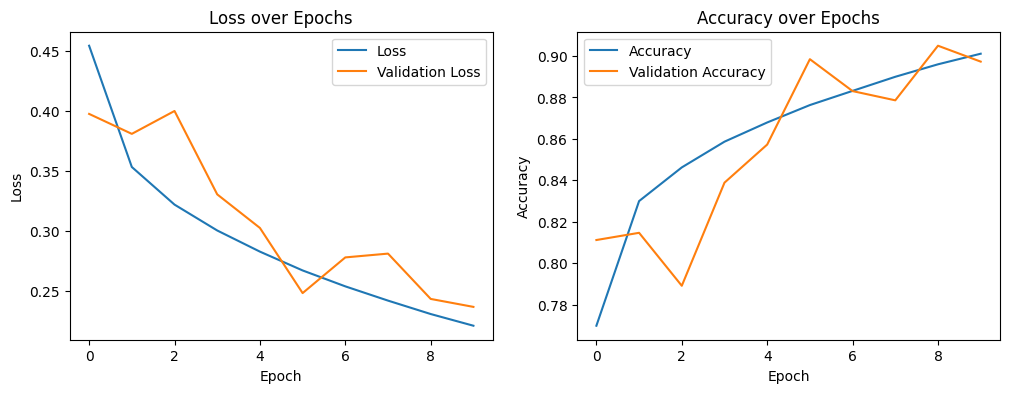

In [24]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)))  # Input layer

    # Funnel-shaped hidden layers
    model.add(tf.keras.layers.Dense(256, activation='relu'))  # First layer with 256 neurons
    model.add(tf.keras.layers.Dense(128, activation='relu'))  # Second layer with 128 neurons
    model.add(tf.keras.layers.Dense(64, activation='relu'))   # Third layer with 64 neurons
    model.add(tf.keras.layers.Dense(32, activation='relu'))   # Fourth layer with 32 neurons

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer (binary classification)

    return model


model = build_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test_reduced, y_test)
print("Test Accuracy:", accuracy)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**The complete model has been taken from the Assignment-2 and further I have performed tuning on it**. 

# Tuning Model using Hyperband

Trial 30 Complete [00h 05m 09s]
val_accuracy: 0.9099636673927307

Best val_accuracy So Far: 0.9206913709640503
Total elapsed time: 01h 09m 53s

The search for hyperparameters has finished. In the initial dense layer, the ideal number of units is 256,
 2nd dense layer is 160,  3rd dense layer is 112,
 4th dense layer is 64, and best optimizer is adam.

Epoch 1/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.7328 - loss: 0.5034 - val_accuracy: 0.8012 - val_loss: 0.4197
Epoch 2/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8265 - loss: 0.3612 - val_accuracy: 0.8124 - val_loss: 0.3752
Epoch 3/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8457 - loss: 0.3240 - val_accuracy: 0.8055 - val_loss: 0.3703
Epoch 4/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8587 - loss: 0.2993 - val_accuracy: 0.8732 - val_loss: 0.2923
Epoch 5/10
11419/11419 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8711 - loss: 0.2771 - val_accuracy: 0.8628 

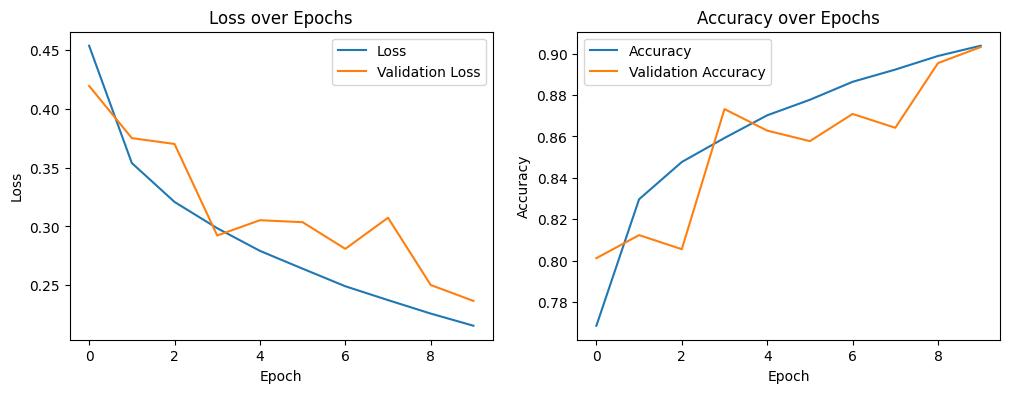

In [25]:
import tensorflow as tf
import kerastuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)))  # Input layer

    # hidden layers
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_1', min_value=128, max_value=512, step=32),
        activation='relu'))
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_2', min_value=64, max_value=256, step=32),
        activation='relu'))
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_3', min_value=32, max_value=128, step=16),
        activation='relu'))
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units_4', min_value=16, max_value=64, step=16),
        activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer will be binary (0, 1)

    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model

# Defining a tuner- Hyperband
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Performing hyperparameter search
tuner.search(X_train_resampled, y_train_resampled, epochs=10, validation_split=0.2)

# Trying to get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The search for hyperparameters has finished. In the initial dense layer, the ideal number of units is {best_hps.get('units_1')},
 2nd dense layer is {best_hps.get('units_2')},  3rd dense layer is {best_hps.get('units_3')},
 4th dense layer is {best_hps.get('units_4')}, and best optimizer is {best_hps.get('optimizer')}.
""")

# Building the model with optimal hyperparameters and training it.
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the model on test data
loss, accuracy = model.evaluate(X_test_reduced, y_test)
print("Test Accuracy:", accuracy)

# Plotting the metrics(training & validation)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


3330/3330 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     97886
         1.0       0.21      0.29      0.24      8671

    accuracy                           0.85    106557
   macro avg       0.57      0.60      0.58    106557
weighted avg       0.88      0.85      0.86    106557



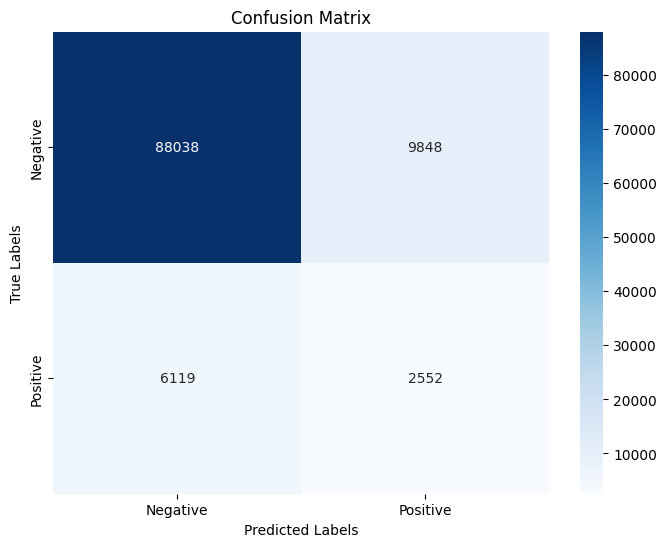

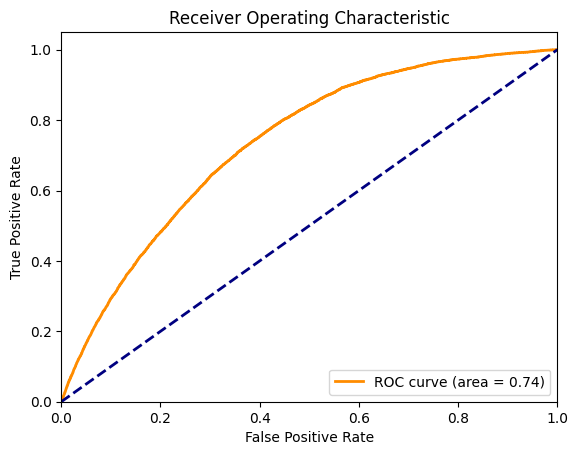

F1 Score (Positive): 0.24
F1 Score (Negative): 0.92


In [26]:
# Predicting the probabilities and binary predictions.
y_probs = model.predict(X_test_reduced)
y_pred = (y_probs > 0.5).astype('int32').flatten()

# Calculating the positive and negative F1 Scores
f1_pos = f1_score(y_test, y_pred, pos_label=1)
f1_neg = f1_score(y_test, y_pred, pos_label=0)

# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Computing ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'F1 Score (Positive): {f1_pos:.2f}')
print(f'F1 Score (Negative): {f1_neg:.2f}')
